In [1]:
!pip install cirq

  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached PyJWT-1.7.1-py2.py3-none-any.whl (18 kB)
  Created wheel for lark: filename=lark-0.11.3-py2.py3-none-any.whl size=99635 sha256=155e7e2100b52b4d75f8b42f117bb6698394e89cd998645896af53ed1a02d1ba
  Stored in directory: c:\users\ameyb\appdata\local\pip\cache\wheels\34\cb\6c\4df359c2a3f0a1af4cccae6392bee423bb5aff530103de3538
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=e25e954dd607b67304a1195b8285ae5e67180926f92f23e8530da1a489c1c5bd
  Stored in directory: c:\users\ameyb\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
  Created wheel for rpcq: filename=rpcq-3.9.2-py3-none-any.whl size=45865 sha256=74d9bce012f3f24fc0fe440ee93502f2efd71bd8bc10324efde8e15d89af21f1
  Stored in directory: c:\users\ameyb\appdata\local\pip\cache\wheels\20\fd\8d\4d4a9f389a9c92210dbee8ca8bbd725a6204f64a8ca8cad841
  Created wheel for msgpack: filename=msgpack-0.6.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [5]:
import tensorflow as tf
import numpy as np
import cirq

%matplotlib inline
import matplotlib.pyplot as plt

from cirq.contrib.svg import SVGCircuit

## Part 1

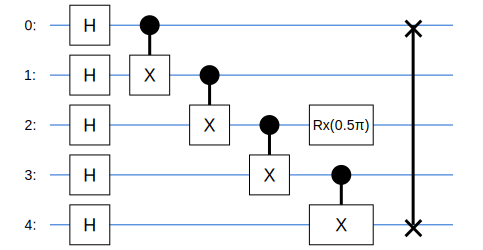

In [17]:
#qubits = cirq.GridQubit.rect(1,5)
circuit = cirq.Circuit()

circuit.append((cirq.H(i)) for i in cirq.LineQubit.range(5))
for i in cirq.LineQubit.range(4):
    circuit.append(cirq.CNOT(control=i , target = i+1))
circuit.append(cirq.SWAP(cirq.LineQubit(0),cirq.LineQubit(4))) 
circuit.append(cirq.rx(np.pi/2).on(cirq.LineQubit(np.random.randint(5))))
SVGCircuit(circuit)

## Part 2

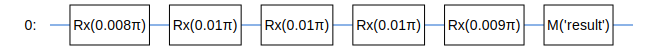

In [37]:
circuit = cirq.Circuit()
qubit=cirq.LineQubit(0)
angle = np.random.random(5)/20
for i in range(5):
    circuit.append(cirq.rx(angle[i]).on(qubit))
circuit.append(cirq.measure(qubit,key='result'))
SVGCircuit(circuit)                  


The probability of measuring a qubit in |0> state :  0.9931640625
Counter({0: 1017, 1: 7})


(array([1017.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

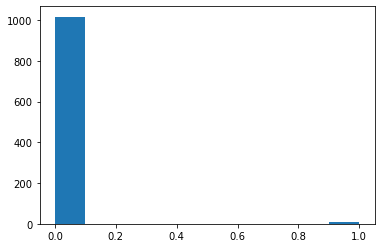

In [52]:
simulator = cirq.Simulator()
samples = simulator.run(circuit, repetitions=1024)
hist_data = samples.measurements['result'].reshape(1024,)
print('The probability of measuring a qubit in |0> state : ', samples.histogram(key='result')[0]/1024)
print(samples.histogram(key='result'))
plt.hist(hist_data)